# Machine Learning from Scratch
## A Hands-On Tutorial for Physicists

This notebook builds your understanding step-by-step:
1. **Tensors**: The fundamental data structure
2. **Automatic Differentiation**: How PyTorch computes gradients
3. **Neural Network Layers**: Building blocks
4. **Training Loop**: Putting it all together

Run each cell and **read the comments carefully**. Experiment by changing values!

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# For reproducibility
torch.manual_seed(42)
np.random.seed(42)

print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"MPS available: {torch.backends.mps.is_available()}")

PyTorch version: 2.9.1
CUDA available: False
MPS available: True


---
# Part 1: Tensors

A **tensor** is like a numpy array, but with superpowers:
- Can live on GPU for fast computation
- Tracks operations for automatic differentiation

In [2]:
# === Creating Tensors ===

# From a list
x = torch.tensor([1.0, 2.0, 3.0])
print(f"From list: {x}")
print(f"  Shape: {x.shape}")
print(f"  Dtype: {x.dtype}")
print(f"  Device: {x.device}")
print()

# Random tensors (very common)
uniform = torch.rand(3, 4)        # Uniform [0, 1)
normal = torch.randn(3, 4)        # Standard normal N(0, 1)
print(f"Random uniform [0,1):\n{uniform}")
print(f"\nRandom normal N(0,1):\n{normal}")

From list: tensor([1., 2., 3.])
  Shape: torch.Size([3])
  Dtype: torch.float32
  Device: cpu

Random uniform [0,1):
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])

Random normal N(0,1):
tensor([[ 2.2082, -0.6380,  0.4617,  0.2674],
        [ 0.5349,  0.8094,  1.1103, -1.6898],
        [-0.9890,  0.9580,  1.3221,  0.8172]])


In [3]:
# === Understanding Shapes ===
# This is CRITICAL for deep learning!

# Convention for images: (Batch, Channels, Height, Width)
#                        (B,     C,        H,      W)

# One grayscale image
single_image = torch.randn(1, 64, 64)  # (C=1, H=64, W=64)
print(f"Single image shape: {single_image.shape}")

# A batch of 16 grayscale images
batch = torch.randn(16, 1, 64, 64)     # (B=16, C=1, H=64, W=64)
print(f"Batch shape: {batch.shape}")
print(f"  - Batch size: {batch.shape[0]}")
print(f"  - Channels: {batch.shape[1]}")
print(f"  - Height: {batch.shape[2]}")
print(f"  - Width: {batch.shape[3]}")

Single image shape: torch.Size([1, 64, 64])
Batch shape: torch.Size([16, 1, 64, 64])
  - Batch size: 16
  - Channels: 1
  - Height: 64
  - Width: 64


In [4]:
# === Tensor Operations ===

a = torch.tensor([1.0, 2.0, 3.0])
b = torch.tensor([4.0, 5.0, 6.0])

print(f"a = {a}")
print(f"b = {b}")
print()

# Element-wise operations (like numpy)
print(f"a + b = {a + b}")           # Addition
print(f"a * b = {a * b}")           # Element-wise multiplication
print(f"a ** 2 = {a ** 2}")         # Square
print(f"torch.exp(a) = {torch.exp(a)}")  # Exponential
print()

# Reduction operations
print(f"a.sum() = {a.sum()}")       # Sum all elements
print(f"a.mean() = {a.mean()}")     # Mean
print(f"a.max() = {a.max()}")       # Maximum


a = tensor([1., 2., 3.])
b = tensor([4., 5., 6.])

a + b = tensor([5., 7., 9.])
a * b = tensor([ 4., 10., 18.])
a ** 2 = tensor([1., 4., 9.])
torch.exp(a) = tensor([ 2.7183,  7.3891, 20.0855])

a.sum() = 6.0
a.mean() = 2.0
a.max() = 3.0


In [6]:
# === Reshaping Tensors ===
# Essential for connecting different layers

x = torch.arange(12)  # [0, 1, 2, ..., 11]
print(f"Original: {x}, shape = {x.shape}")

# Reshape to 3x4 matrix
x_matrix = x.view(3, 4)
print(f"\nAs 3x4 matrix:\n{x_matrix}")

# Use -1 to infer a dimension
x_auto = x.view(4, -1)  # -1 means "figure it out"
print(f"\nAs 4x? matrix:\n{x_auto}")

# Add/remove dimensions
x_2d = torch.randn(64, 64)
x_3d = x_2d.unsqueeze(0)  # Add dimension at position 0
x_4d = x_3d.unsqueeze(0)  # Add another
print(f"\n2D → 3D → 4D: {x_2d.shape} → {x_3d.shape} -> {x_4d.shape}")

Original: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]), shape = torch.Size([12])

As 3x4 matrix:
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

As 4x? matrix:
tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])

2D → 3D → 4D: torch.Size([64, 64]) → torch.Size([1, 64, 64]) -> torch.Size([1, 1, 64, 64])


---
# Part 2: Automatic Differentiation

This is the **magic** of PyTorch. It automatically computes gradients!

**Physical analogy**: If your loss function is a potential energy $V(\theta)$, 
PyTorch computes the force $F = -\nabla V$ for you.

In [ ]:
# === Basic Gradient Computation ===

# Create a tensor and tell PyTorch to track gradients
x = torch.tensor([2.0], requires_grad=True)

# Define a function: y = x^2
y = x ** 2

# Compute the gradient dy/dx
y.backward()

# The gradient is stored in x.grad
print(f"x = {x.item()}")
print(f"y = x² = {y.item()}")
print(f"dy/dx = 2x = {x.grad.item()}")
print()
print("Verification: dy/dx = 2 * 2 = 4 ✓")

x = 2.0
y = x² = 4.0
dy/dx = 2x = 4.0

Verification: dy/dx = 2 * 2 = 4 ✓


In [8]:
# === The Chain Rule in Action ===
# z = (x + y)^2 where x = 2, y = 3

x = torch.tensor([2.0], requires_grad=True)
y = torch.tensor([3.0], requires_grad=True)

# Forward pass
s = x + y      # s = 5
z = s ** 2     # z = 25

# Backward pass
z.backward()

print(f"x = {x.item()}, y = {y.item()}")
print(f"z = (x + y)² = {z.item()}")
print(f"\ndz/dx = 2(x+y) * 1 = {x.grad.item()}")
print(f"dz/dy = 2(x+y) * 1 = {y.grad.item()}")
print()
print("Verification: dz/dx = 2*(2+3)*1 = 10 ✓")

x = 2.0, y = 3.0
z = (x + y)² = 25.0

dz/dx = 2(x+y) * 1 = 10.0
dz/dy = 2(x+y) * 1 = 10.0

Verification: dz/dx = 2*(2+3)*1 = 10 ✓


In [9]:
# === Gradients for Neural Network Weights ===

# Imagine a simple linear model: prediction = w * x + b
# We want to find w and b that minimize prediction error

# Learnable parameters
w = torch.tensor([1.0], requires_grad=True)  # Weight
b = torch.tensor([0.0], requires_grad=True)  # Bias

# Data point
x = torch.tensor([2.0])    # Input
y_true = torch.tensor([5.0])  # Target (ground truth)

# Forward pass
y_pred = w * x + b
print(f"Prediction: y_pred = w*x + b = {w.item()}*{x.item()} + {b.item()} = {y_pred.item()}")

# Loss: Mean Squared Error
loss = (y_pred - y_true) ** 2
print(f"Loss: (y_pred - y_true)² = ({y_pred.item()} - {y_true.item()})² = {loss.item()}")

# Backward pass
loss.backward()

print(f"\nGradients:")
print(f"  ∂Loss/∂w = {w.grad.item():.2f}")
print(f"  ∂Loss/∂b = {b.grad.item():.2f}")
print()
print("These tell us how to adjust w and b to reduce the loss!")

Prediction: y_pred = w*x + b = 1.0*2.0 + 0.0 = 2.0
Loss: (y_pred - y_true)² = (2.0 - 5.0)² = 9.0

Gradients:
  ∂Loss/∂w = -12.00
  ∂Loss/∂b = -6.00

These tell us how to adjust w and b to reduce the loss!


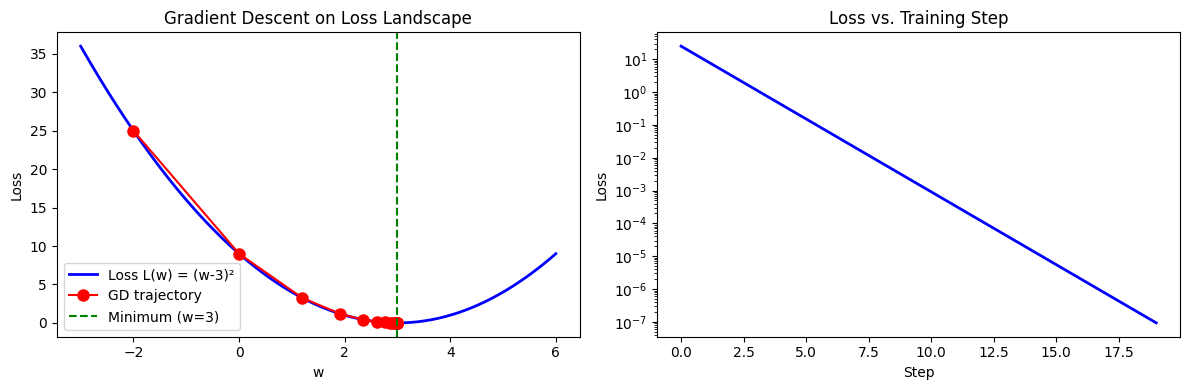

Final w = 2.9998 (target: 3.0)


In [10]:
# === Visualize: Gradient Descent on a Quadratic ===

# Loss function: L(w) = (w - 3)^2
# Minimum at w = 3

# Starting point
w = torch.tensor([-2.0], requires_grad=True)
lr = 0.2  # Learning rate

# Store trajectory
w_history = [w.item()]
loss_history = []

# Gradient descent
for step in range(20):
    # Forward: compute loss
    loss = (w - 3) ** 2
    loss_history.append(loss.item())
    
    # Backward: compute gradient
    loss.backward()
    
    # Update: move opposite to gradient
    with torch.no_grad():  # Don't track this operation
        w -= lr * w.grad
    
    # Reset gradient for next iteration
    w.grad.zero_()
    
    w_history.append(w.item())

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Loss landscape
w_range = np.linspace(-3, 6, 100)
loss_landscape = (w_range - 3) ** 2
ax1.plot(w_range, loss_landscape, 'b-', lw=2, label='Loss L(w) = (w-3)²')
ax1.plot(w_history, [(w - 3)**2 for w in w_history], 'ro-', markersize=8, label='GD trajectory')
ax1.axvline(x=3, color='g', linestyle='--', label='Minimum (w=3)')
ax1.set_xlabel('w')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.set_title('Gradient Descent on Loss Landscape')

# Loss over time
ax2.plot(loss_history, 'b-', lw=2)
ax2.set_xlabel('Step')
ax2.set_ylabel('Loss')
ax2.set_title('Loss vs. Training Step')
ax2.set_yscale('log')

plt.tight_layout()
plt.show()

print(f"Final w = {w.item():.4f} (target: 3.0)")

---
# Part 3: Neural Network Layers

Now let's build actual neural network components.

In [11]:
# === The Linear Layer ===
# Computes: y = x @ W.T + b
# (matrix multiplication + bias)

# nn.Linear(input_features, output_features)
linear = nn.Linear(10, 5)  # 10 inputs → 5 outputs

print("Linear layer: 10 → 5")
print(f"  Weight shape: {linear.weight.shape}")  # (5, 10)
print(f"  Bias shape: {linear.bias.shape}")      # (5,)
print(f"  Total parameters: {10*5 + 5} = {sum(p.numel() for p in linear.parameters())}")
print()

# Pass data through
x = torch.randn(32, 10)  # Batch of 32 samples, 10 features each
y = linear(x)
print(f"Input shape: {x.shape}")
print(f"Output shape: {y.shape}")

Linear layer: 10 → 5
  Weight shape: torch.Size([5, 10])
  Bias shape: torch.Size([5])
  Total parameters: 55 = 55

Input shape: torch.Size([32, 10])
Output shape: torch.Size([32, 5])


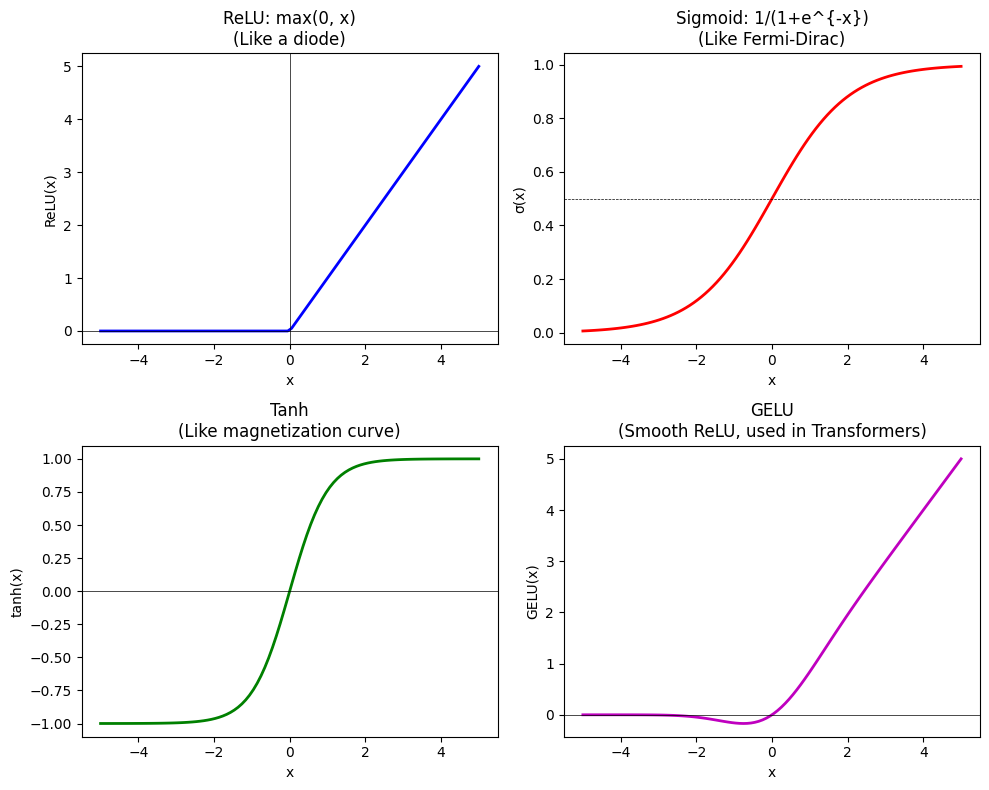

In [12]:
# === Activation Functions ===
# Without these, neural networks would be just linear!

x = torch.linspace(-5, 5, 100)

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# ReLU: max(0, x)
ax = axes[0, 0]
ax.plot(x, torch.relu(x), 'b-', lw=2)
ax.axhline(y=0, color='k', lw=0.5)
ax.axvline(x=0, color='k', lw=0.5)
ax.set_title('ReLU: max(0, x)\n(Like a diode)')
ax.set_xlabel('x')
ax.set_ylabel('ReLU(x)')

# Sigmoid: 1/(1+e^-x)
ax = axes[0, 1]
ax.plot(x, torch.sigmoid(x), 'r-', lw=2)
ax.axhline(y=0.5, color='k', lw=0.5, ls='--')
ax.set_title('Sigmoid: 1/(1+e^{-x})\n(Like Fermi-Dirac)')
ax.set_xlabel('x')
ax.set_ylabel('σ(x)')

# Tanh: (e^x - e^-x)/(e^x + e^-x)
ax = axes[1, 0]
ax.plot(x, torch.tanh(x), 'g-', lw=2)
ax.axhline(y=0, color='k', lw=0.5)
ax.set_title('Tanh\n(Like magnetization curve)')
ax.set_xlabel('x')
ax.set_ylabel('tanh(x)')

# GELU: x * Φ(x) where Φ is normal CDF
ax = axes[1, 1]
ax.plot(x, torch.nn.functional.gelu(x), 'm-', lw=2)
ax.axhline(y=0, color='k', lw=0.5)
ax.set_title('GELU\n(Smooth ReLU, used in Transformers)')
ax.set_xlabel('x')
ax.set_ylabel('GELU(x)')

plt.tight_layout()
plt.show()

In [13]:
# === The Convolutional Layer ===
# Slides a kernel across the input, computing dot products

# nn.Conv2d(in_channels, out_channels, kernel_size)
conv = nn.Conv2d(
    in_channels=1,      # Input has 1 channel (grayscale)
    out_channels=32,    # Output has 32 channels (32 filters)
    kernel_size=3,      # 3×3 kernel
    padding=1           # Pad to preserve spatial size
)

print("Conv2d: 1 channel → 32 channels, 3×3 kernel")
print(f"  Weight shape: {conv.weight.shape}")  # (32, 1, 3, 3)
print(f"  = 32 filters × 1 input channel × 3×3 kernel")
print(f"  Bias shape: {conv.bias.shape}")      # (32,)
print(f"  Total parameters: {32*1*3*3 + 32} = {sum(p.numel() for p in conv.parameters())}")
print()

# Pass an image through
x = torch.randn(1, 1, 64, 64)  # (B=1, C=1, H=64, W=64)
y = conv(x)
print(f"Input shape: {x.shape}")
print(f"Output shape: {y.shape}")

Conv2d: 1 channel → 32 channels, 3×3 kernel
  Weight shape: torch.Size([32, 1, 3, 3])
  = 32 filters × 1 input channel × 3×3 kernel
  Bias shape: torch.Size([32])
  Total parameters: 320 = 320

Input shape: torch.Size([1, 1, 64, 64])
Output shape: torch.Size([1, 32, 64, 64])


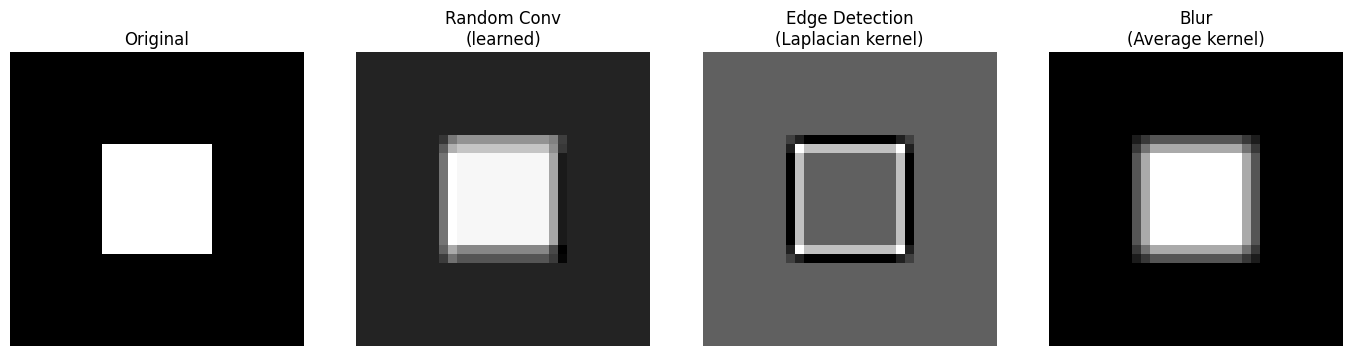

In [14]:
# === Visualize Convolution ===

# Create a simple test image
image = torch.zeros(1, 1, 32, 32)
image[0, 0, 10:22, 10:22] = 1.0  # White square

# Apply different convolutions
conv_random = nn.Conv2d(1, 1, 3, padding=1)

# Edge detection kernel (manually set)
conv_edge = nn.Conv2d(1, 1, 3, padding=1, bias=False)
conv_edge.weight.data = torch.tensor([
    [[-1, -1, -1],
     [-1,  8, -1],
     [-1, -1, -1]]
]).float().unsqueeze(0)

# Blur kernel
conv_blur = nn.Conv2d(1, 1, 3, padding=1, bias=False)
conv_blur.weight.data = torch.ones(1, 1, 3, 3).float() / 9

fig, axes = plt.subplots(1, 4, figsize=(14, 3.5))

axes[0].imshow(image[0, 0], cmap='gray')
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(conv_random(image)[0, 0].detach(), cmap='gray')
axes[1].set_title('Random Conv\n(learned)')
axes[1].axis('off')

axes[2].imshow(conv_edge(image)[0, 0].detach(), cmap='gray')
axes[2].set_title('Edge Detection\n(Laplacian kernel)')
axes[2].axis('off')

axes[3].imshow(conv_blur(image)[0, 0].detach(), cmap='gray')
axes[3].set_title('Blur\n(Average kernel)')
axes[3].axis('off')

plt.tight_layout()
plt.show()

In [15]:
# === Pooling: Coarse Graining ===
# Like block-spin renormalization!

x = torch.randn(1, 1, 8, 8)  # 8×8 image

# Max pooling: take max in each 2×2 block
maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
y_max = maxpool(x)

# Average pooling: take mean in each 2×2 block
avgpool = nn.AvgPool2d(kernel_size=2, stride=2)
y_avg = avgpool(x)

print(f"Input shape: {x.shape}")
print(f"After MaxPool(2): {y_max.shape}")
print(f"After AvgPool(2): {y_avg.shape}")
print()
print("Pooling reduces spatial dimensions by factor of 2")
print("This is COARSE GRAINING - discarding high-frequency info")

Input shape: torch.Size([1, 1, 8, 8])
After MaxPool(2): torch.Size([1, 1, 4, 4])
After AvgPool(2): torch.Size([1, 1, 4, 4])

Pooling reduces spatial dimensions by factor of 2
This is COARSE GRAINING - discarding high-frequency info


---
# Part 4: Building a Complete CNN

Now let's put it all together!

In [16]:
# === A Simple CNN from Scratch ===

class SimpleCNN(nn.Module):
    """
    A minimal CNN for understanding.
    
    Architecture:
    Input (1, 32, 32) 
      → Conv (16, 32, 32) → ReLU → Pool (16, 16, 16)
      → Conv (32, 16, 16) → ReLU → Pool (32, 8, 8)
      → Flatten (32*8*8 = 2048)
      → Linear (64)
      → Linear (1)
    """
    def __init__(self):
        super().__init__()
        
        # Convolutional layers
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        
        # Pooling
        self.pool = nn.MaxPool2d(2, 2)
        
        # Fully connected layers
        self.fc1 = nn.Linear(32 * 8 * 8, 64)
        self.fc2 = nn.Linear(64, 1)
        
        # Activation
        self.relu = nn.ReLU()
    
    def forward(self, x):
        # Input: (B, 1, 32, 32)
        print(f"  Input: {x.shape}")
        
        # Conv block 1
        x = self.conv1(x)
        print(f"  After conv1: {x.shape}")
        x = self.relu(x)
        x = self.pool(x)
        print(f"  After pool1: {x.shape}")
        
        # Conv block 2
        x = self.conv2(x)
        print(f"  After conv2: {x.shape}")
        x = self.relu(x)
        x = self.pool(x)
        print(f"  After pool2: {x.shape}")
        
        # Flatten
        x = x.view(x.size(0), -1)
        print(f"  After flatten: {x.shape}")
        
        # Fully connected
        x = self.fc1(x)
        x = self.relu(x)
        print(f"  After fc1: {x.shape}")
        
        x = self.fc2(x)
        print(f"  Output: {x.shape}")
        
        return x

# Test it
model = SimpleCNN()
x = torch.randn(4, 1, 32, 32)  # Batch of 4
print("Forward pass through SimpleCNN:")
y = model(x)

# Count parameters
num_params = sum(p.numel() for p in model.parameters())
print(f"\nTotal parameters: {num_params:,}")

Forward pass through SimpleCNN:
  Input: torch.Size([4, 1, 32, 32])
  After conv1: torch.Size([4, 16, 32, 32])
  After pool1: torch.Size([4, 16, 16, 16])
  After conv2: torch.Size([4, 32, 16, 16])
  After pool2: torch.Size([4, 32, 8, 8])
  After flatten: torch.Size([4, 2048])
  After fc1: torch.Size([4, 64])
  Output: torch.Size([4, 1])

Total parameters: 136,001


Training...
Epoch  10 | Train: 0.0441 | Val: 0.0360
Epoch  20 | Train: 0.0387 | Val: 0.0319
Epoch  30 | Train: 0.0175 | Val: 0.0114
Epoch  40 | Train: 0.0079 | Val: 0.0052
Epoch  50 | Train: 0.0060 | Val: 0.0053


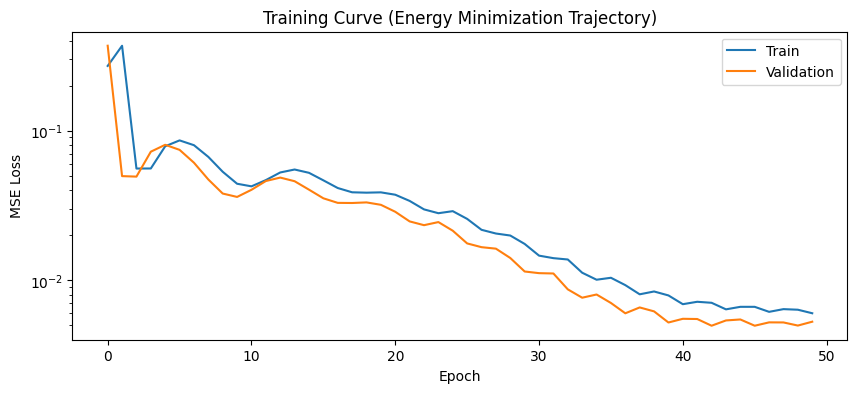

In [17]:
# === The Complete Training Loop ===

# Remove print statements for actual training
class SimpleCNN2(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 8 * 8, 64)
        self.fc2 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        return self.fc2(x)

# Create synthetic data
def generate_data(n_samples):
    """Generate random data: parameter controls image "texture"."""
    params = np.random.uniform(0, 1, n_samples)
    images = []
    for p in params:
        # Higher p = more high-frequency noise
        img = np.random.randn(32, 32) * p + np.random.randn(32, 32) * 0.5
        images.append(img)
    return torch.tensor(np.array(images), dtype=torch.float32).unsqueeze(1), \
           torch.tensor(params, dtype=torch.float32).unsqueeze(1)

# Generate data
X_train, y_train = generate_data(500)
X_val, y_val = generate_data(100)

# Initialize
model = SimpleCNN2()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
train_losses = []
val_losses = []

print("Training...")
for epoch in range(50):
    # === Training ===
    model.train()
    optimizer.zero_grad()
    
    predictions = model(X_train)
    loss = criterion(predictions, y_train)
    
    loss.backward()
    optimizer.step()
    
    train_losses.append(loss.item())
    
    # === Validation ===
    model.eval()
    with torch.no_grad():
        val_pred = model(X_val)
        val_loss = criterion(val_pred, y_val)
        val_losses.append(val_loss.item())
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1:3d} | Train: {loss.item():.4f} | Val: {val_loss.item():.4f}")

# Plot
plt.figure(figsize=(10, 4))
plt.plot(train_losses, label='Train')
plt.plot(val_losses, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Curve (Energy Minimization Trajectory)')
plt.legend()
plt.yscale('log')
plt.show()

---
# Summary

## Key Concepts

| Concept | Code | Physics Analogy |
|---------|------|----------------|
| Tensor | `torch.tensor(...)` | Field values on a discretized space |
| Gradient | `loss.backward()` | Force = -∇V |
| Linear layer | `nn.Linear(in, out)` | Affine transformation |
| Convolution | `nn.Conv2d(...)` | Green's function |
| Pooling | `nn.MaxPool2d(...)` | Coarse graining / RG |
| Loss | `nn.MSELoss()` | Potential energy V(θ) |
| Optimizer | `torch.optim.Adam(...)` | Dynamics with momentum |

## The Training Recipe

```python
for epoch in range(num_epochs):
    # 1. Forward pass
    predictions = model(inputs)
    loss = criterion(predictions, targets)
    
    # 2. Backward pass
    optimizer.zero_grad()
    loss.backward()
    
    # 3. Update parameters
    optimizer.step()
```

## Next Steps

1. Run `python -m src --epochs 20 --no-wandb` to train on cosmological data
2. Open `01_physics_check.ipynb` to visualize the GRF fields
3. Read `docs/LEARNING_GUIDE.md` for deeper theory